# Session 8 - Locality Sensitive Hashing

Octavi Pascual - December 28<sup>th</sup>, 2016

Import of all the modules that we will need to perform our work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lsh import lsh

data = np.load('images.npy')

## Task 1: Understanding the code and basic functioning of lsh

To understand how parameters m and k affect the execution time of the program, we will fix one of them and change the value of the other one. Then we will plot the execution time against the different values of the modified parameter and analyse the results.

Computing execution time for values of m: 
5->0.236; 25->1.149; 45->2.058; 65->2.921; 85->3.841; 105->4.819; 125->5.710; 145->6.940; 165->7.513; 185->8.355; 

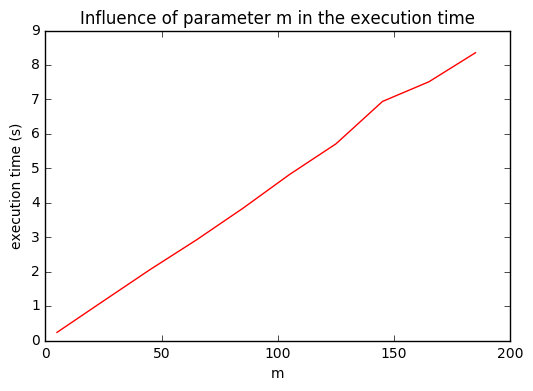

In [2]:
m_values = np.arange(5, 200, step=20)
times = []

print("Computing execution time for values of m: ")
for i in m_values:
    print(i, end="->")
    time = %timeit -o -n1 -r1 -q lsh(k=20, m=i)
    times.append(time.best)
    print("{0:.3f}".format(time.best), end="; ")

plt.title('Influence of parameter m in the execution time')
plt.xlabel('m')
plt.ylabel('execution time (s)')

plt.plot(m_values, times, color='r')
plt.show()

When we increase the m parameter, the execution time increases linearly. In fact, we are increasing the number of times we repeat the process of hashing. That is, for each image we are repeating the hashing process m times. That's why, if we double m, we will also double the execution time of the program.

Computing execution time for values of k: 
20->0.243; 40->0.431; 60->0.630; 80->0.829; 100->0.991; 120->1.172; 140->1.404; 160->1.617; 180->1.738; 

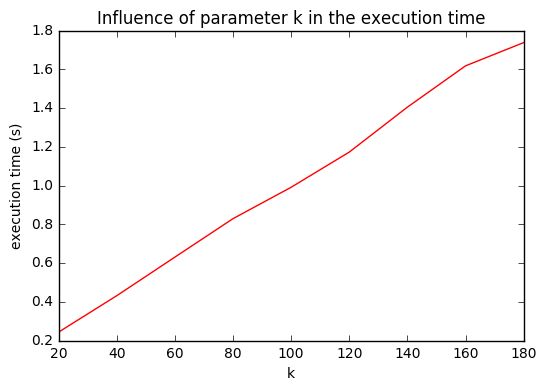

In [3]:
k_values = np.arange(20, 200, step=20)
times = []

print("Computing execution time for values of k: ")
for i in k_values:
    print(i, end="->")
    time = %timeit -o -n1 -r1 -q lsh(k=i, m=5)
    times.append(time.best)
    print("{0:.3f}".format(time.best), end="; ")

plt.title('Influence of parameter k in the execution time')
plt.xlabel('k')
plt.ylabel('execution time (s)')

plt.plot(k_values, times, color='r')
plt.show()

When we increase the k parameter, the execution time also increases linearly. This time we are increasing the number of times we stack together the hash function.

If we take a closer look at the implementation of the hashing part, we see that for each image we iterate through an m x k matrix. That means that the cost for each image is O(mk). That explains the linear relation of the parameters m and k with respect to the execution time. 

Computing size of candidates for values of m: 
1->38; 3->109; 5->130; 7->209; 9->243; 11->243; 13->245; 15->278; 17->278; 19->291; 21->312; 23->312; 25->317; 27->322; 29->381; 31->393; 33->393; 35->405; 37->409; 39->412; 41->429; 43->475; 45->476; 47->478; 49->486; 

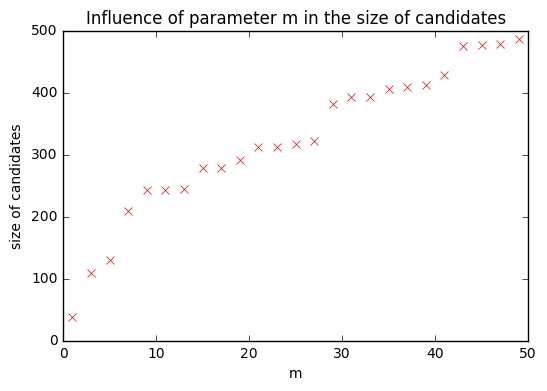

In [4]:
m_values = np.arange(1, 50, step=2)
candidates = []
image = data[1500]

print("Computing size of candidates for values of m: ")
for i in m_values:
    print(i, end="->")
    me = lsh(k=20, m=i)
    candidate = len(me.candidates(image))
    candidates.append(candidate)
    print(candidate, end="; ")

plt.title('Influence of parameter m in the size of candidates')
plt.xlabel('m')
plt.ylabel('size of candidates')

plt.plot(m_values, candidates, 'x', color='r')
plt.show()

We observe that the size of candidates grows as the parameter m increases. In fact, by repeating the process of hashing m times the probability of collision of similar objects increases. That is why the more big is m, the more candidates an image will have.

Computing size of candidates for values of k: 
1->1500; 3->1438; 5->1483; 7->879; 9->679; 11->946; 13->410; 15->560; 17->266; 19->96; 21->180; 23->77; 25->82; 27->37; 29->12; 31->11; 33->13; 35->6; 37->3; 39->10; 41->14; 43->3; 45->2; 47->1; 49->1; 

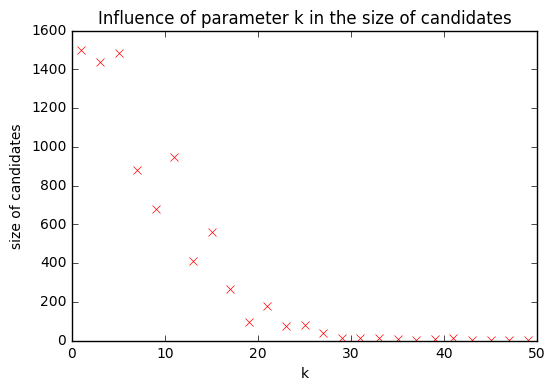

In [5]:
k_values = np.arange(1, 50, step=2)
candidates = []
image = data[1500]

print("Computing size of candidates for values of k: ")
for i in k_values:
    print(i, end="->")
    me = lsh(k=i, m=5)
    candidate = len(me.candidates(image))
    candidates.append(candidate)
    print(candidate, end="; ")

plt.title('Influence of parameter k in the size of candidates')
plt.xlabel('k')
plt.ylabel('size of candidates')

plt.plot(k_values, candidates, 'x', color='r')
plt.show()

We observe that with low values of k the size of the candidates is close to the total number of images we have, so all images are candidates. As we increase k the size drops fast and when k is around 30 we already have a size close to 0. Remember that by stacking together k hash functions, we are decreasing the probability of collision of similar images.

## Task 2: Does lsh work?

In the following cell we implement a function that computes the distance between two input images. The distance is the sum of absolute values of differences between pixels in the input images. Note that in this case this is the Hamming distance of the two images (number of different bits).

In [6]:
def distance(image1, image2):
    hamming = 0
    for (_, a), (_, b) in zip(np.ndenumerate(image1), np.ndenumerate(image2)):
        hamming = hamming + bin(int(a)^int(b)).count('1')
    return hamming

The next function implements brute_force search. Given an input image, we compute the distance to all images in the dataset and we return the one that is closest.

In [7]:
def brute_force(image):
    minDistance = float("inf")
    closestImage = None
    for i, candidate in enumerate(data[:1500]):
        currentDistance = distance(image, candidate)
        if currentDistance < minDistance:
            minDistance = currentDistance
            closestImage = i
    return closestImage, minDistance

Now we can try to use this brute force function and see how it performs.

The distance between both images is 48


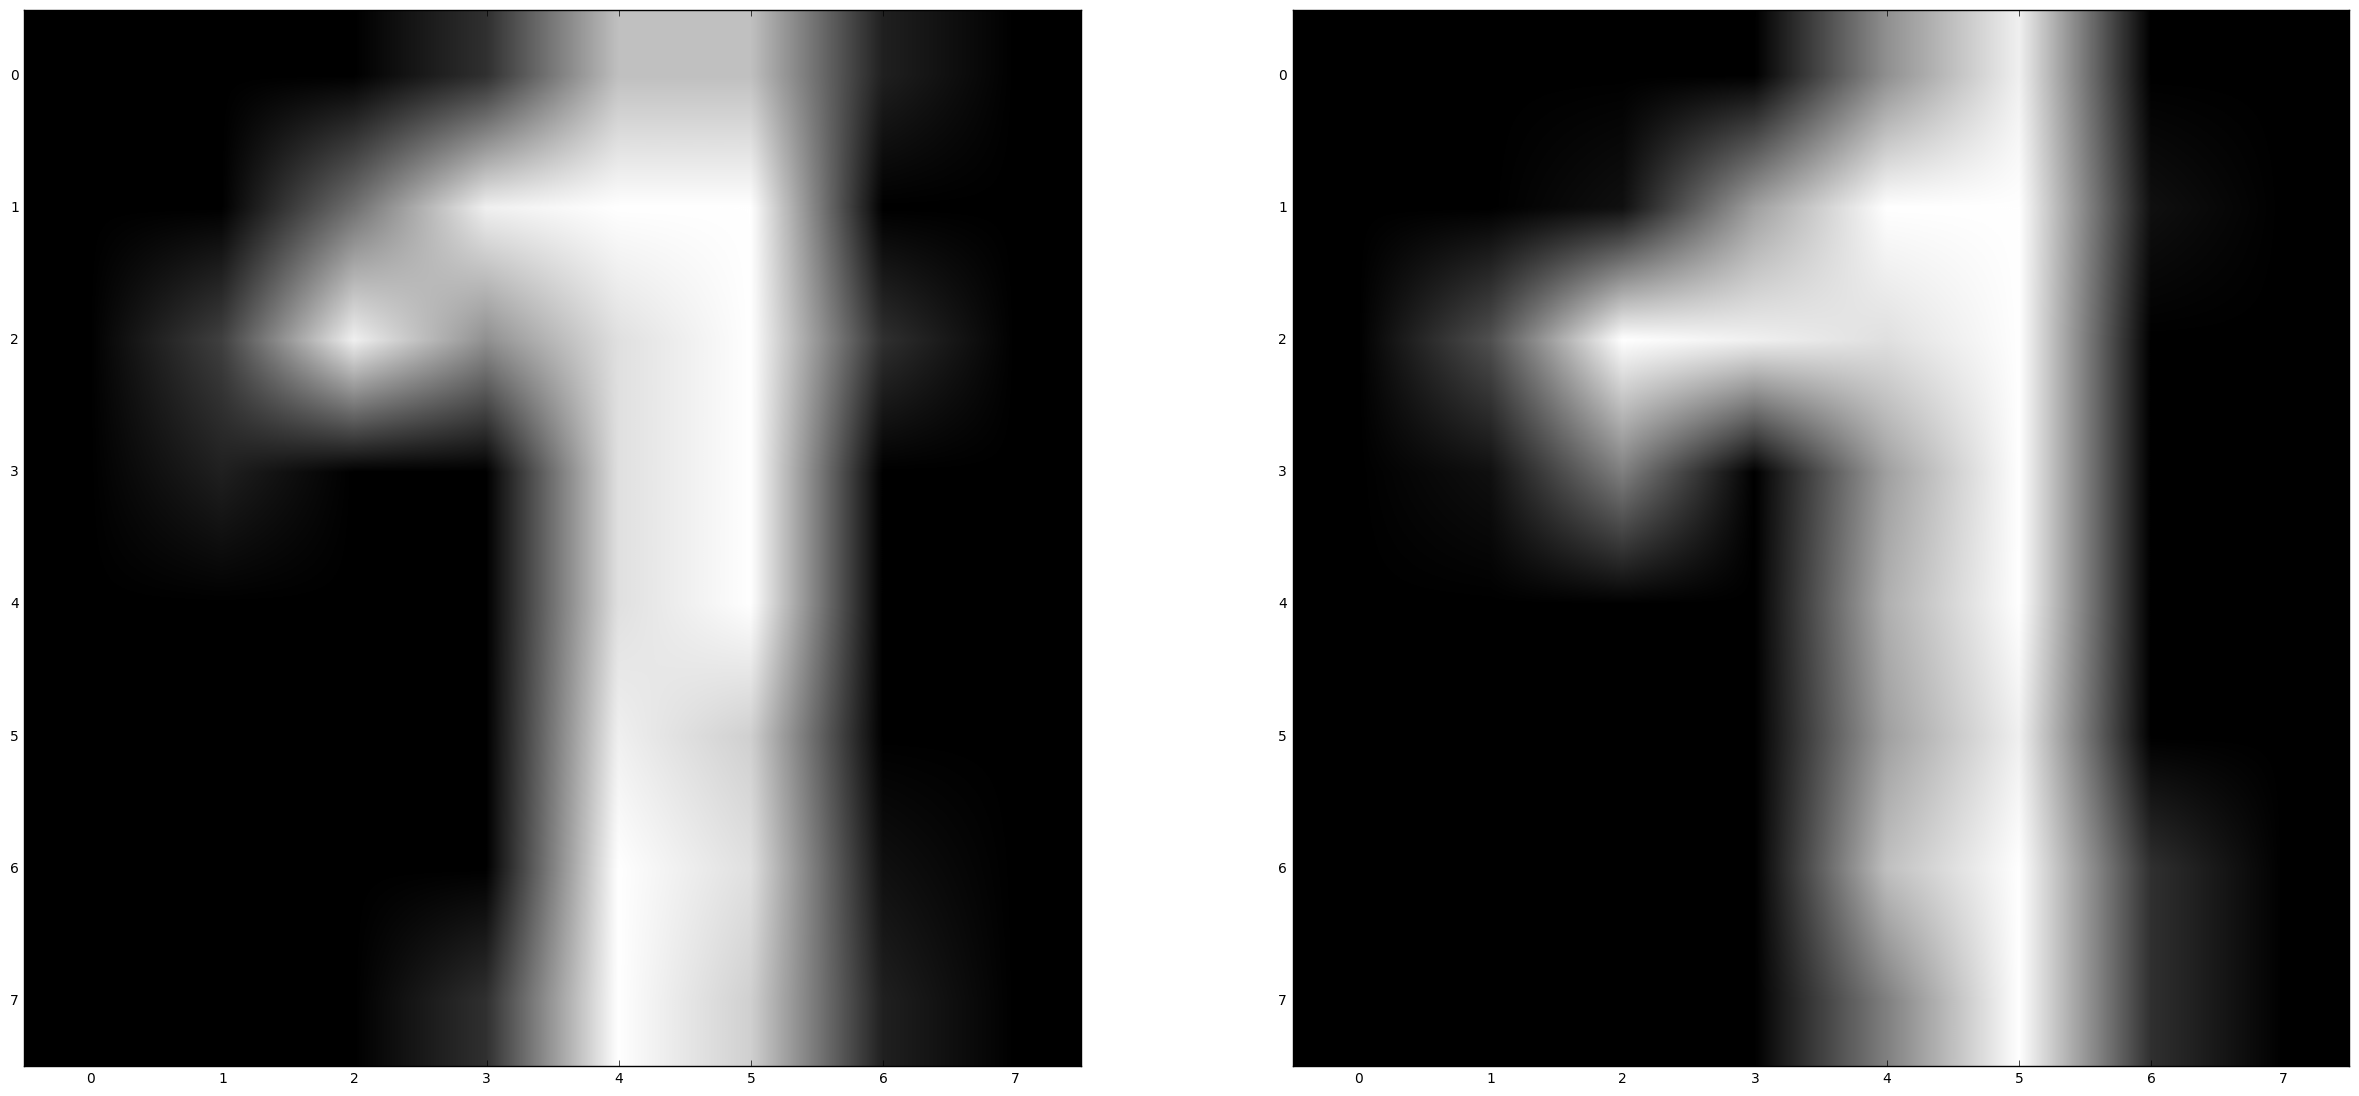

The distance between both images is 42


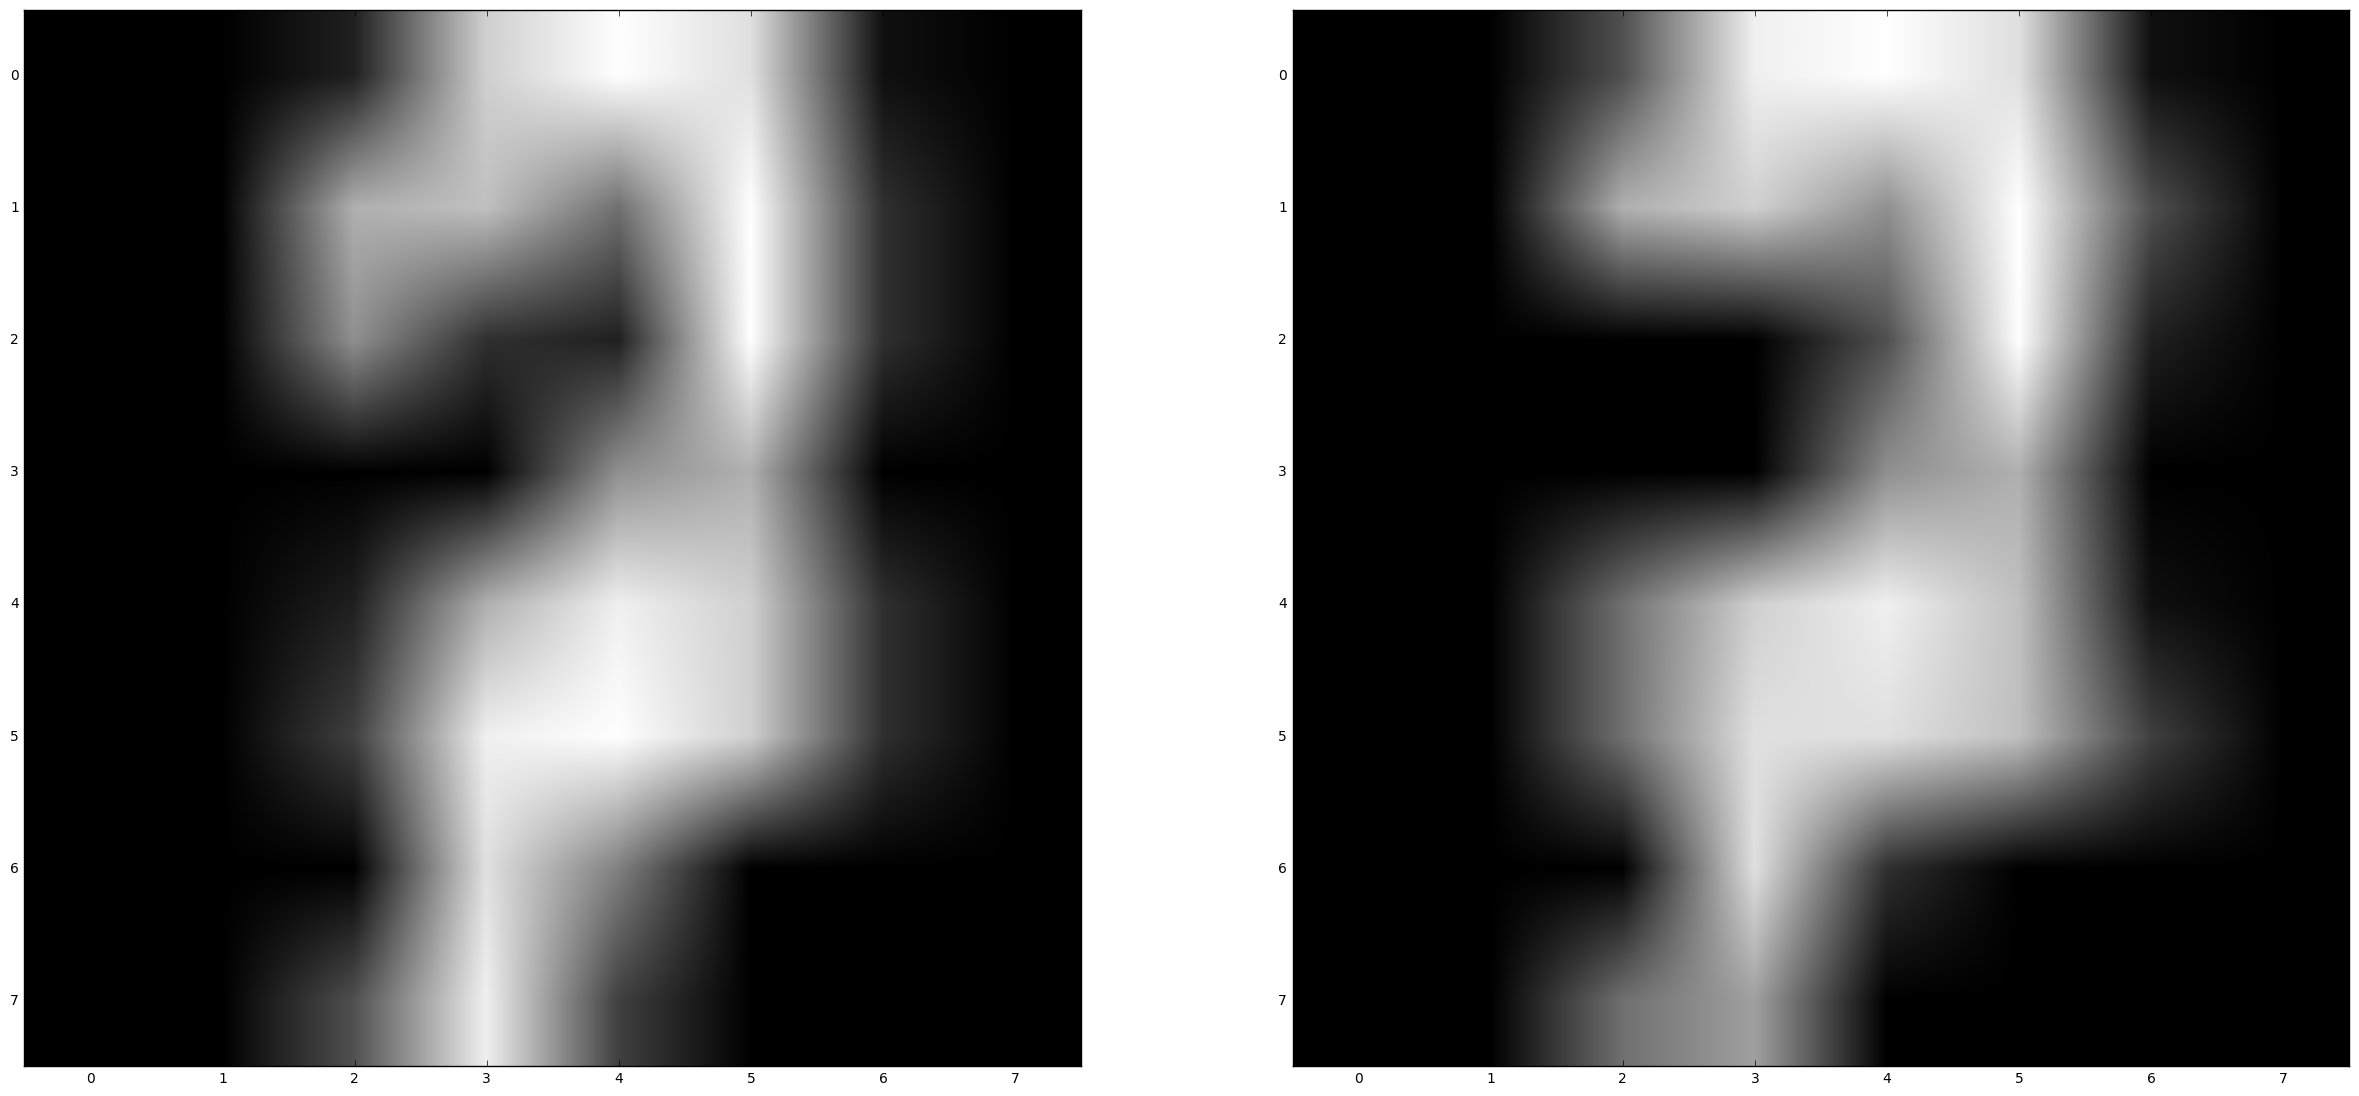

In [8]:
def plot_two_images(image1, image2):       
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(30)
    sp1 = fig.add_subplot(1,2,1)
    sp1.imshow(image1, cmap=plt.cm.gray)
    sp1 = fig.add_subplot(1,2,2)
    sp1.imshow(image2, cmap=plt.cm.gray)
    plt.show()

closestImage, minDistance = brute_force(data[1500])
print("The distance between both images is %d" % minDistance)
plot_two_images(data[1500], data[closestImage])

closestImage, minDistance = brute_force(data[1501])
print("The distance between both images is %d" % minDistance)
plot_two_images(data[1501], data[closestImage])

Finally we implement a function that given an input image uses lsh to find all the candidates. Then it iterates through all those candidates to find the closest image.

In [9]:
def search(k, m, image):
    me = lsh(k, m)
    cands = me.candidates(image)
    
    minDistance = float("inf")
    closestImage = None
    for i, candidate in enumerate(cands):
        currentDistance = distance(image, data[candidate])
        if currentDistance < minDistance:
            minDistance = currentDistance
            closestImage = i
    return closestImage, minDistance

To measure how well hashing performs, we can do the following test. For each image in the test set, we find its closest image using brute force and hashing. Then we compute the difference between the best distance (obtained with brute force) and the hashing distance (obtained with hashing). We expect to be zero most of the time, since similar images should be in the same bucket. However it is possible that the most similar image is not in the same bucket (false negative). Anyways, we expect that the error obtained will be low since the images in the same bucket are still similar with the image we are testing.

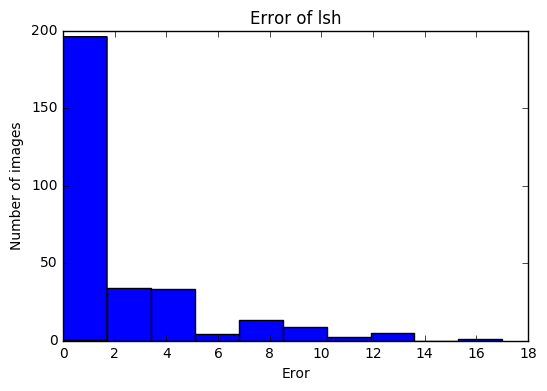

In [10]:
errors = []

for i in range(1500, len(data)):
    _, minDistance = brute_force(data[i])
    _, hashingDistance = search(20, 5, data[i])
    errors.append(hashingDistance - minDistance)

plt.title('Error of lsh')
plt.xlabel('Eror')
plt.ylabel('Number of images')
r = plt.hist(errors)

The results show that by far the most common error is 0, that is both lsh and brute force find the same image. We also see that if the error is not 0 it is close to 0, that means that if lsh does not find the best image it still finds a similar one.

To end this work, we can say that Locality Sensitive Hashing is a powerful hashing technique that helps to find similar items with high probability. Even if the similar item retrieved is not always the most similar in the dataset, in most of the cases it is. Moreover, another useful feature of this technique is that most of the work consists in preprocessing the training data, and this can be done offline. This helps when we have a lot of data which nowadays is a common scenario. 